
# **Reto 2 - NLP: Análisis de Sentimientos Api Twitter**
<img src="https://www.udistrital.edu.co/sites/default/files/contenido-estatico/imagenes/escudo_ud.gif" align="left" width="200px" height="200px"/>

> Miguel Angel Fuentes Ramirez - **COD. 20182005007**

<br>Scripts Disponibles en : </br>
[![Miguel Angel Fuentes Ramirez](https://img.shields.io/badge/MiguelAFuentesR-github-br?style=flat-square)](https://github.com/MiguelAFuentesR/Ciencia_de_Datos)
[![License](https://img.shields.io/badge/license-MIT-green)](https://opensource.org/licenses/MIT)

Este Archivo presenta la explicación paso a paso de la propuesta para la solución del Reto2, para probar el programa realizarlo en: 

[![Miguel Angel Fuentes Ramirez](https://colab.research.google.com/img/colab_favicon.ico)](https://colab.research.google.com/drive/18gK0tiKQgOZU074OPqomX047QJAr9U9O?usp=sharing) 


Trabajo Elaborado para la Asignatura Introducción a la Ciencia de Datos

RETO PROPUESTO : PROCESAMIENTO DE LENGUAJE NATURAL

Seleccionar uno de los siguientes wrappers de python para trabajar con el API de twitter (https://developer.twitter.com).

* Tweepy 
* Python Twitter Tools
* Python-twitter
* Twython

Utilice uno o varios paquetes de python que permiten hacer NLP, como por ejemplo:

* NLTK 
* TextBlob 
* WordCloud 
* Spacy

Utilizando el wrapper y el paquete seleccionado haga una análisis NLP 
de tweets (tema libre)


Desarrolle un pre-procesamiento que involucre tareas típicas, tales como:

* Tokenizar 
* Eliminar stop-words (artículos, pronombres, preposiciones, etc) 
* Convertir a minúscula 
* Eliminar acentos 
* Eliminar caracteres especiales 
* Tratar con hashtags y otra simbología propia de Twitter 
* Procesar negaciones
* Tratar URLs 
Etc…


Desarrolle una transformación que involucre tareas típicas, tales como:

* Lematizar
* Stemming


Minería de datos e Interpretación 

* Estadística descriptiva 
* Análisis de sentimientos

In [ ]:
!pip install tweepy

In [2]:

# tweepy para realizar el analisis y recoleccion de los tweets
import tweepy as tw
import numpy as np
import pandas as pd


#Importanto paquetes
from nltk import SnowballStemmer
from textblob import TextBlob
from wordcloud import WordCloud
import spacy
import re
from nltk.tokenize import word_tokenize 
from unicodedata import normalize

#nltk librería de análisis de lenguaje
import nltk
#Descargar las stopwords de la librería nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords

#Concatenar las stopwords aplicándose a una cuenta que genera contenido en inglés y español
from nltk import tokenize


## Plt
import matplotlib.pyplot as plt
import seaborn as sns
# Orgnizar el diccionario de datos 
import operator

print("Importaciones Completadas!!")

[nltk_data] Downloading package punkt to /root/nltk_data...

[nltk_data]   Unzipping tokenizers/punkt.zip.

[nltk_data] Downloading package stopwords to /root/nltk_data...


Importaciones Completadas!!


[nltk_data]   Unzipping corpora/stopwords.zip.


Para realizar el ingreso al API de twitter se debe crear una APP y obtener las credenciales necesarias , con estas se realiza el siguiente procedimiento de conexión : 


In [3]:
# Conexion al Api

ApiKey = 'f5PE2WrMehZuvjavX7mHgCtj8'
ApikeySecret = 'Z9SJUpDH3o2tEifQA42BXHipbY4O8eyeHrXckEMJIFQlBUYrIs'
accessToken = '1058072506366603265-oSRXtzB01vzI5ZNOcVCw5bb1Dkxgad'
accessTokenSecret = 'iOPvcn9w0aPCa0h0Oayqa3JHyoZssXxzsgFPw4CaWjkq9'

Creando la autenticacion con el wrapper de twitter podemos realizar el proceso de extraer tweets, para el analisis.

In [4]:
# Crear un objeto de autenticacion 
authenticate = tw.OAuthHandler(ApiKey, ApikeySecret) 
    
# Poner acces token y acces token secret
authenticate.set_access_token(accessToken, accessTokenSecret) 

auth = tw.AppAuthHandler(ApiKey,ApikeySecret)
   
# Creando el objeto API mientras se pasa la info de autenticacion
# Guardamos en una variable
global api 
api = tw.API(auth)


Funcion para recolectar la cantidad de  tweets deseados de la API de twitter con la palabra clave ingresada  y en el idioma especificado.

In [5]:
def BuscarTweets(Busqueda,idioma, cantidad):
    # Recolectando tweets 
    try: 
        tweet = tw.Cursor(api.search,q=Busqueda, tweet_mode="extended", lang=idioma).items(cantidad)
        return [tweet.full_text for tweet in tweet]
    except: 
        print("Error recolectando tweets")
        return None 


# 1. Pre-Procesamiento (Tareas Típicas de limpieza) :

In [72]:
#Función de limpieza de texto
Mystopwords = ["AT_USER","URL","rt","amp","new","th","along","icai","would","today","asks"]

def LimpiezaTexto(text):
  text = re.sub(r'@[A-Za-z0-9]+', '',text)                        #Eliminando @Menciones
  text = text.lower()                                              #Pasar a minusculas
  text = re.sub(r'#', '',text)                                    #Eliminando el simbolo '#'
  text = re.sub(r'_', '',text)                                    #Eliminando el simbolo '_'
  text = re.sub(r'RT[\s]+', '',text)                              #Eliminando RT
  text = re.sub(r'[^\w\s]', '',text)
  text = re.sub(r'[^\x00-\x7F]+',' ',text) 
  text = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', 'URL', text)  #Eliminando el hipervinculo
  text = re.sub(r': ','', text)                                    #Eliminando el simbolo :
  text = re.sub(r'\n','', text)                                    #Eliminando el simbolo \n
  text = re.sub(r'-',' ', text)                                    #Eliminando el simbolo -
  text = re.sub(r'@',' ', text)                                    #Eliminando el simbolo @
  text = re.sub(r'\?',' ', text)     
  text = re.sub(r'\"',' ', text) 
  text = re.sub(r'rt',' ', text) 
  text = text.encode('ascii','ignore').decode('ascii')             #Eliminando Emojis
  
  #Eliminar tildes 
  for i in range(len(tweets)): 
      tweets[i] =  normalize( 'NFC', re.sub( r"([^n\u0300-\u036f]|n(?!\u0303(?![\u0300-\u036f])))[\u0300-\u036f]+", r"\1", normalize( "NFD", tweets[i]), 0, re.I))
  return text

def Tokenizar(text):
  text = word_tokenize(text)
  return text

def Stopwords(Text):
   # Quitar stopwords
  stop = stopwords.words('spanish')
  stop_en = stopwords.words('english')
  stop.extend(Mystopwords)
  stop.extend(stop_en)
  Text= [w for w in Text if not w in stop]
  return Text


In [78]:
## LLamado de la Funcion que recolecta los tweets 

tweets = BuscarTweets("Ukraine","en",1000) #Recolectar 1000 twwets en ingles con palabra clave Ukraine
twt = np.array(tweets )
#Conversion de la informacion en dataframe
df = pd.DataFrame(twt, columns=['Tweets'])
df

,Tweets
0,RT @UASunflower: This father is now on the fro...
1,RT @KyivIndependent: ⚡️ Deputy PM urges Kherso...
2,RT @TelegraphWorld: ⚡️ Russia suffers ‘wild sh...
3,Netherlands to provide Ukraine with modern hea...
4,RT @JackPosobiec: How much money did Hunter Bi...
...,...
995,RT @TexPatriot5: @JackPosobiec #BidenGarbageFa...
996,I find it kind of amazing the people who think...
997,RT @eugene_finkel: We need a name for this men...
998,RT @LPNH: Here's what supporting democracy loo...


In [79]:
#Realizando la limpieza en el texto
df['Tweets'] = df['Tweets'].apply(LimpiezaTexto)
df
#Eliminar Stopwords

,Tweets
0,this father is now on the front line defend...
1,deputy pm urges kherson oblast residents t...
2,russia suffers wild shell hunger as ukrain...
3,netherlands to provide ukraine with modern hea...
4,how much money did hunter biden and his fam...
...,...
995,bidengarbagefamily looks like they stole m...
996,i find it kind of amazing the people who think...
997,finkel we need a name for this mental afflic...
998,heres what suppo ing democracy looks like i...


In [80]:
# Datos : 
df 
#Tokenizar una copia del dataframe : 
df_co = df
df_co['Tokens'] = df_co['Tweets'].apply(Tokenizar)
df_co['Limpio'] = df_co['Tokens'].apply(Stopwords)
df_co

,Tweets,Tokens,Limpio
0,this father is now on the front line defend...,"[this, father, is, now, on, the, front, line, ...","[father, front, line, defending, ukraine, wish..."
1,deputy pm urges kherson oblast residents t...,"[deputy, pm, urges, kherson, oblast, residents...","[deputy, pm, urges, kherson, oblast, residents..."
2,russia suffers wild shell hunger as ukrain...,"[russia, suffers, wild, shell, hunger, as, ukr...","[russia, suffers, wild, shell, hunger, ukraine..."
3,netherlands to provide ukraine with modern hea...,"[netherlands, to, provide, ukraine, with, mode...","[netherlands, provide, ukraine, modern, heavy,..."
4,how much money did hunter biden and his fam...,"[how, much, money, did, hunter, biden, and, hi...","[much, money, hunter, biden, family, steal, pe..."
...,...,...,...
995,bidengarbagefamily looks like they stole m...,"[bidengarbagefamily, looks, like, they, stole,...","[bidengarbagefamily, looks, like, stole, milli..."
996,i find it kind of amazing the people who think...,"[i, find, it, kind, of, amazing, the, people, ...","[find, kind, amazing, people, think, biden, ca..."
997,finkel we need a name for this mental afflic...,"[finkel, we, need, a, name, for, this, mental,...","[finkel, need, name, mental, affliction, west,..."
998,heres what suppo ing democracy looks like i...,"[heres, what, suppo, ing, democracy, looks, li...","[heres, suppo, ing, democracy, looks, like, uk..."


# 2. Desarrollo de una transformación : Aplicando NLP con Spacy y NLTK - Lematización y stemming

In [81]:
#Se crea una copia del dataframe y se carga spacy
nlp = spacy.load('en_core_web_sm')
df_nlp = pd.DataFrame()
df_nlp["Tweets"] = df["Tweets"]

#Función para generar tokens y eliminar signos de puntuación
def tokens(text):
  doc = nlp(text)
  tokens = [word.orth_ for word in doc if not word.is_punct | word.is_stop] # Limpieza de artículos y signos de puntuacion
  return tokens

#Función para aplicar lematizado a los tokens
def lemmas(tokens):
  doc = nlp(" ".join(tokens))
  lemmas = [tok.lemma_.lower() for tok in doc]#Lematizado de la frase completa
  return lemmas

#Función para aplicar Stemming a los tokens
def stemm(tokens):
  stemmer = SnowballStemmer("english")
  stems = [stemmer.stem(token) for token in tokens]
  return stems


#Se llaman las funciones y se añaden a las columnas
tokens = df_nlp['Tweets'].apply(tokens)
df_nlp['Lemmas'] = tokens.apply(lemmas)
df_nlp['Stemm'] = tokens.apply(stemm)
df_nlp['Tokens'] = df_co['Tokens']
df_nlp['Limpio'] = df_co['Tokens'].apply(Stopwords)
df_nlp

,Tweets,Lemmas,Stemm,Tokens,Limpio
0,this father is now on the front line defend...,"[ , father, line, defend, ukraine, wish, th...","[ , father, line, defend, ukrain, wish, thre...","[this, father, is, now, on, the, front, line, ...","[father, front, line, defending, ukraine, wish..."
1,deputy pm urges kherson oblast residents t...,"[ , deputy, pm, urge, kherson, oblast, res...","[ , deputi, pm, urg, kherson, oblast, resid...","[deputy, pm, urges, kherson, oblast, residents...","[deputy, pm, urges, kherson, oblast, residents..."
2,russia suffers wild shell hunger as ukrain...,"[ , russia, suffer, wild, shell, hunger, u...","[ , russia, suffer, wild, shell, hunger, uk...","[russia, suffers, wild, shell, hunger, as, ukr...","[russia, suffers, wild, shell, hunger, ukraine..."
3,netherlands to provide ukraine with modern hea...,"[netherlands, provide, ukraine, modern, heavy,...","[netherland, provid, ukrain, modern, heavi, we...","[netherlands, to, provide, ukraine, with, mode...","[netherlands, provide, ukraine, modern, heavy,..."
4,how much money did hunter biden and his fam...,"[ , money, hunter, biden, family, steal, pe...","[ , money, hunter, biden, famili, steal, peo...","[how, much, money, did, hunter, biden, and, hi...","[much, money, hunter, biden, family, steal, pe..."
...,...,...,...,...,...
995,bidengarbagefamily looks like they stole m...,"[ , bidengarbagefamily, look, like, steal,...","[ , bidengarbagefamili, look, like, stole, ...","[bidengarbagefamily, looks, like, they, stole,...","[bidengarbagefamily, looks, like, stole, milli..."
996,i find it kind of amazing the people who think...,"[find, kind, amazing, people, think, biden, ca...","[find, kind, amaz, peopl, think, biden, caus, ...","[i, find, it, kind, of, amazing, the, people, ...","[find, kind, amazing, people, think, biden, ca..."
997,finkel we need a name for this mental afflic...,"[ , finkel, need, mental, affliction, west, ...","[ , finkel, need, mental, afflict, west, forc...","[finkel, we, need, a, name, for, this, mental,...","[finkel, need, name, mental, affliction, west,..."
998,heres what suppo ing democracy looks like i...,"[ , here, suppo, ing, democracy, look, like...","[ , here, suppo, ing, democraci, look, like,...","[heres, what, suppo, ing, democracy, looks, li...","[heres, suppo, ing, democracy, looks, like, uk..."


## Polaridad y subjetividad - Lemmas y Stemm

In [82]:
#Creando una funcion para obtener la subjetividad
def getSubjectivity(texto):
  text = TextBlob(" ".join(texto))
  return text.sentiment.subjectivity

#Creando una funcion para obtener la polaridad
def getPolarity(texto):
  text = TextBlob(" ".join(texto))
  return text.sentiment.polarity

#Aplicando funciones de polaridad y subjetividad a lemmas y stemming
df["Subjetividad - Lemmas"] = df_nlp["Lemmas"].apply(getSubjectivity)
df["Polaridad - Lemmas"] = df_nlp["Lemmas"].apply(getPolarity)
df["Subjetividad - Stemme"] = df_nlp["Stemm"].apply(getSubjectivity)
df["Polaridad - Stemme"] = df_nlp["Stemm"].apply(getPolarity)
df["Polaridad - Tokens"] = df_nlp["Limpio"].apply(getPolarity)
df["Subjetividad - Tokens"] = df_nlp["Limpio"].apply(getSubjectivity)
df

,Tweets,Tokens,Limpio,Subjetividad - Lemmas,Polaridad - Lemmas,Subjetividad - Stemme,Polaridad - Stemme,Polaridad - Tokens,Subjetividad - Tokens
0,this father is now on the front line defend...,"[this, father, is, now, on, the, front, line, ...","[father, front, line, defending, ukraine, wish...",1.000000,0.80,0.00,0.0000,0.800000,1.000000
1,deputy pm urges kherson oblast residents t...,"[deputy, pm, urges, kherson, oblast, residents...","[deputy, pm, urges, kherson, oblast, residents...",0.000000,0.00,0.00,0.0000,0.000000,0.000000
2,russia suffers wild shell hunger as ukrain...,"[russia, suffers, wild, shell, hunger, as, ukr...","[russia, suffers, wild, shell, hunger, ukraine...",0.200000,0.05,0.20,0.0500,-0.166667,0.366667
3,netherlands to provide ukraine with modern hea...,"[netherlands, to, provide, ukraine, with, mode...","[netherlands, provide, ukraine, modern, heavy,...",0.400000,0.00,0.30,0.2000,0.000000,0.400000
4,how much money did hunter biden and his fam...,"[how, much, money, did, hunter, biden, and, hi...","[much, money, hunter, biden, family, steal, pe...",0.000000,0.00,0.00,0.0000,0.200000,0.200000
...,...,...,...,...,...,...,...,...,...
995,bidengarbagefamily looks like they stole m...,"[bidengarbagefamily, looks, like, they, stole,...","[bidengarbagefamily, looks, like, stole, milli...",1.000000,0.00,0.00,0.0000,0.000000,1.000000
996,i find it kind of amazing the people who think...,"[i, find, it, kind, of, amazing, the, people, ...","[find, kind, amazing, people, think, biden, ca...",0.551111,0.11,0.54,-0.0300,0.064286,0.657143
997,finkel we need a name for this mental afflic...,"[finkel, we, need, a, name, for, this, mental,...","[finkel, need, name, mental, affliction, west,...",0.200000,-0.10,0.20,-0.1000,-0.100000,0.200000
998,heres what suppo ing democracy looks like i...,"[heres, what, suppo, ing, democracy, looks, li...","[heres, suppo, ing, democracy, looks, like, uk...",0.000000,0.00,0.00,0.0000,0.000000,0.000000


## 3. Minería de datos e Interpretación 

## **Análisis de sentimientos Sentimientos :**

In [83]:
# Crear una funcion para adquirir la subjectividad del tweet
def Subjetividad(text):
   return TextBlob(text).sentiment.subjectivity

# Crear una funcion para determminar la polaridad
def Polaridad(text):
   return  TextBlob(text).sentiment.polarity

# Crear una funcion para calcular negativo (-1), neutral (0) y positivo (+1)
def Analisis(score):
  if score < 0:
    return 'Negativo'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positivo'
    
# Crear dos nuevas columnas 'Subjectividad' y 'Polaridad'
df['Subjetividad'] = df['Tweets'].apply(Subjetividad)
df['Polaridad'] = df['Tweets'].apply(Polaridad)

# Mostrar el nuevo dataframe con columnas 'Subjectividad' y 'Polaridad'


In [84]:

df['Analisis'] = df['Polaridad'].apply(Analisis)# Mostrar el dataframe

# Imprimir el porcentaje de tweets positivos
ptweets = df[df.Analisis == 'Positivo']
ptweets = ptweets['Tweets']
ptweets

round( (ptweets.shape[0] / df.shape[0]) * 100 , 1)

# Imprimir el porcentaje de tweets negativos

ntweets = df[df.Analisis == 'Negativo']
ntweets = ntweets['Tweets']
ntweets

round( (ntweets.shape[0] / df.shape[0]) * 100, 1)

#Ahora se mira la percepcion de los tweets en general.

# Mostrar el valor de conteo
df['Analisis'].value_counts()


Neutral     482
Positivo    320
Negativo    198
Name: Analisis, dtype: int64

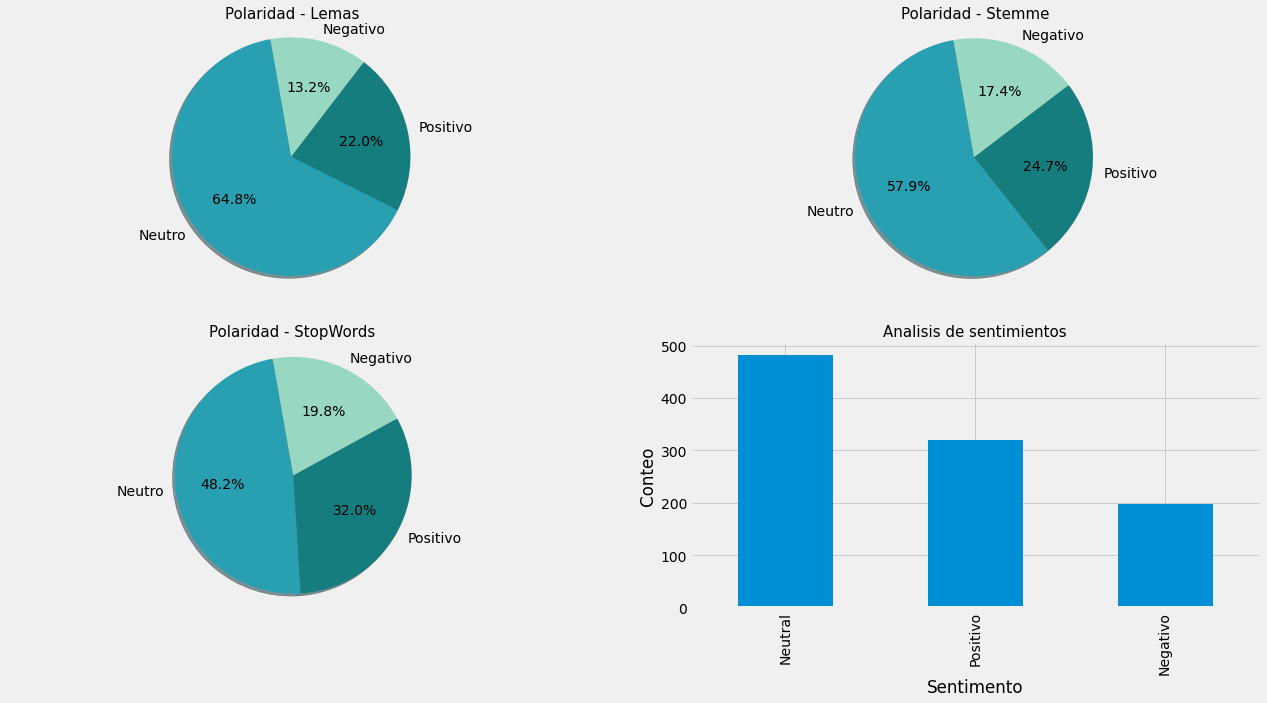

In [85]:
#Funcion para realizar un analisis negativo, neutral y positivo
def x_range(x):
  if x > 0:
    return 1
  elif x == 0:
    return 0
  else:
    return -1 
#Funcion para realizar un analisis negativo, neutral y positivo
def y_range(y):
  if y > 0:
    return 1
  elif y == 0:
    return 0
  else:
    return -1 

#Al resultado le pasamos los valores de la polaridad para graficar
df['resultado'] = df["Polaridad - Stemme"].apply(y_range)

#Al resultado le pasamos los valores de la polaridad para graficar
df['result'] = df["Polaridad - Lemmas"].apply(x_range)

#grafica
x = df['resultado'].value_counts()
y = df['result'].value_counts()
z = df['Analisis'].value_counts()


fig = plt.figure(figsize=(20,10))
ax1 = plt.subplot(221)
ax2 = plt.subplot(222)
ax3 = plt.subplot(223)
ax4 = plt.subplot(224)

labels = 'Neutro', 'Positivo', 'Negativo'
colors = ['#29A0B1', '#167D7F','#98D7C2']


ax1.pie(x, labels = labels, colors = colors, autopct='%1.1f%%',shadow = True, startangle = 100 )
ax2.pie(y, labels = labels, colors = colors, autopct='%1.1f%%',shadow = True, startangle = 100 )
ax3.pie(z, labels = labels, colors = colors, autopct='%1.1f%%',shadow = True, startangle = 100 )
df['Analisis'].value_counts().plot(kind='bar')

ax1.axis('equal')
ax2.axis('equal')
ax3.axis('equal')

ax4.set_xlabel('Sentimento')
ax4.set_ylabel('Conteo')

ax1.set_title('Polaridad - Lemas', fontsize = 15)
ax2.set_title('Polaridad - Stemme', fontsize = 15)
ax3.set_title('Polaridad - StopWords', fontsize = 15)
ax4.set_title('Analisis de sentimientos', fontsize = 15)
plt.show()


<function matplotlib.pyplot.show>

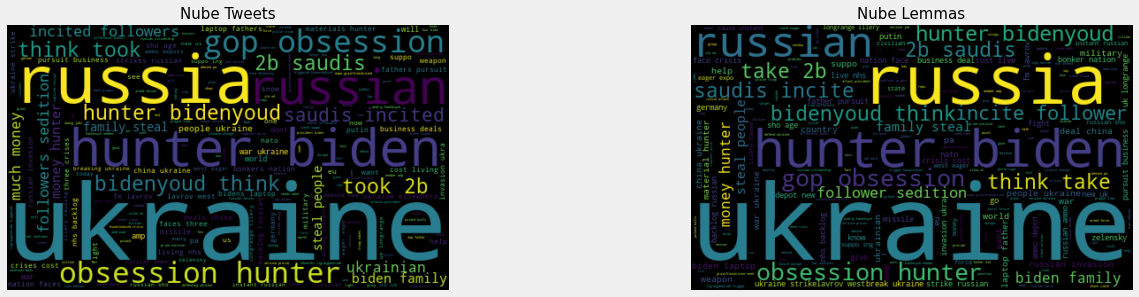

In [86]:
#Creando una funcion para obtener el texto
def getText(texto):
  return " ".join(texto)



fig = plt.figure(figsize=(20,10))
ax1 = plt.subplot(221)
ax2 = plt.subplot(222)



#Grafica nubes de palabras
palabras = ' '.join( [tweets for tweets in df['Tweets']] )
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=119).generate(palabras)

#Configuraciones de la grafica
ax1.imshow(wordCloud, interpolation='bilinear')
ax1.axis('off')

#------------------------------------------------------------------------
#Grafica nubes de palabras
palabras = ' '.join( df_nlp["Lemmas"].apply(getText) )
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=119).generate(palabras)

#Configuraciones de la grafica
ax2.imshow(wordCloud, interpolation='bilinear')
ax2.axis('off')

ax1.set_title('Nube Tweets', fontsize = 15)
ax2.set_title('Nube Lemmas', fontsize = 15)
plt.show

## **Estadística descriptiva :**

Estadistica descriptiva sobre subjetividad-lemmas

count      3.000000

mean     333.333333

std      276.038645

min      132.000000

25%      176.000000

50%      220.000000

75%      434.000000

max      648.000000

Name: resultado, dtype: float64



Estadistica descriptiva sobre Polaridad-lemmas

count      3.000000

mean     333.333333

std      215.861839

min      174.000000

25%      210.500000

50%      247.000000

75%      413.000000

max      579.000000

Name: result, dtype: float64

Estadistica descriptiva sobre subjetividad-stemme

count      3.000000

mean     333.333333

std      276.038645

min      132.000000

25%      176.000000

50%      220.000000

75%      434.000000

max      648.000000

Name: resultado, dtype: float64



Estadistica descriptiva sobre Polaridad-stemme

count      3.000000

mean     333.333333

std      215.861839

min      174.000000

25%      210.500000

50%      247.000000

75%      413.000000

max      579.000000

Name: result, dtype: float64


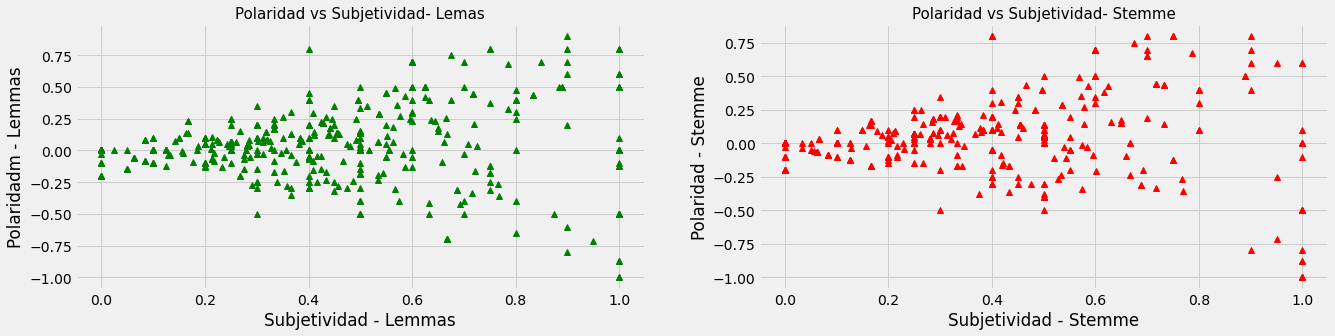

In [89]:
fig = plt.figure(figsize=(20,10))
ax1 = plt.subplot(221)
ax2 = plt.subplot(222)


x_1=df['Subjetividad - Lemmas']
y_1=df['Polaridad - Lemmas']
ax1.plot(x_1,y_1,'g^')
ax1.set_xlabel('Subjetividad - Lemmas')
ax1.set_ylabel('Polaridadm - Lemmas')

x_2=df['Subjetividad - Stemme']
y_2=df['Polaridad - Stemme']
ax2.plot(x_2,y_2,'r^')
ax2.set_xlabel('Subjetividad - Stemme')
ax2.set_ylabel('Polaridad - Stemme')


ax1.set_title('Polaridad vs Subjetividad- Lemas', fontsize = 15)
ax2.set_title('Polaridad vs Subjetividad- Stemme', fontsize = 15)

print('Estadistica descriptiva sobre subjetividad-lemmas')
print(x.describe())
print('\nEstadistica descriptiva sobre Polaridad-lemmas')
print(y.describe())

print('Estadistica descriptiva sobre subjetividad-stemme')
print(x.describe())
print('\nEstadistica descriptiva sobre Polaridad-stemme')
print(y.describe())

In [88]:
Mystopwords = ["AT_USER","URL","rt","amp","new","th","along","icai","would","today","asks"]
def Limpieza(tweets):
    try:
        # Preprocesamiento
        Limpieza = ' '.join(tweets)
        # Minusculas
        Limpieza =  Limpieza.lower()
        # URL
        Limpieza = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', 'URL', Limpieza) 
        # Quitar # en #hashtag
        Limpieza = re.sub(r'#([^\s]+)', r'\1', Limpieza) 
        # Quitar nombres de usuarios
        Limpieza = re.sub('@[^\s]+', 'AT_USER', Limpieza)
        # Ascii por espacio
        Limpieza = re.sub(r'[^\x00-\x7F]+',' ', Limpieza)
        # punctuacion
        Limpieza = re.sub(r'[^\w\s]', '', Limpieza)
        # emojis
        Limpieza= Limpieza.encode('ascii', 'ignore').decode('ascii')
        # Espacio al final
        Limpieza = Limpieza.strip()
        # Quitar numeros
        Limpieza = re.sub('[0-9]+', '', Limpieza)
        # token
        Limpieza = word_tokenize(Limpieza)
        # Quitar stopwords
        stop = stopwords.words('english')
        stop.extend(Mystopwords)
        Limpieza = [w for w in Limpieza if not w in stop] 
        return Limpieza
    except:
        print("ERROR en la funcion Limpieza")
        return None

[('ukraine', 705), ('russian', 191), ('russia', 166), ('biden', 150), ('war', 131), ('hunter', 124), ('people', 84), ('money', 82), ('us', 69), ('think', 69), ('putin', 68), ('ukrainian', 62), ('b', 55), ('took', 52), ('much', 51), ('family', 50), ('gop', 50), ('obsession', 50), ('youd', 50), ('saudis', 50), ('incited', 50), ('followers', 50), ('sedition', 50), ('uk', 48), ('steal', 45), ('like', 44), ('china', 39), ('president', 37), ('time', 37), ('invasion', 37), ('one', 35), ('military', 34), ('world', 32), ('help', 32), ('west', 31), ('strikes', 30), ('see', 29), ('forces', 29), ('germany', 28), ('business', 27), ('artillery', 27), ('weapons', 26), ('ukraines', 26), ('laptop', 26), ('bidens', 25), ('support', 25), ('ukrainians', 25), ('deals', 25), ('said', 25), ('three', 25), ('make', 24), ('elsewhere', 24), ('crises', 24), ('depots', 23), ('army', 23), ('nato', 23), ('materials', 23), ('fathers', 23), ('pursuit', 23), ('grain', 22), ('need', 22), ('back', 22), ('breaking', 22), 

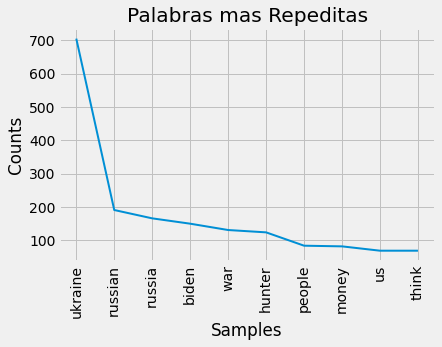

In [90]:
from nltk.probability import FreqDist 
Palabras = Limpieza(tweets)
fdist = FreqDist(Palabras) 
print(fdist.most_common(100))
plt.title('Palabras mas Repeditas')
fdist.plot(10,cumulative=False) 
plt.show()

## **Histogramas** 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

  warnings.warn(msg, FutureWarning)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

  warnings.warn(msg, FutureWarning)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level funct

Text(0.5, 0, '')

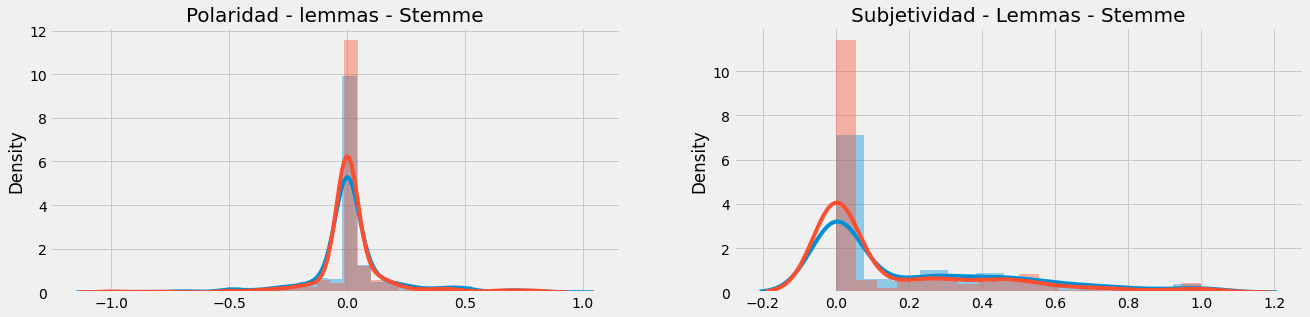

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20,10))
ax1 = plt.subplot(221)
ax2 = plt.subplot(222)

sns.distplot(df["Polaridad - Lemmas"],ax=ax1)
sns.distplot(df["Polaridad - Stemme"],ax=ax1)
ax1.set_title('Polaridad - lemmas - Stemme', fontsize = 20)

ax1.set_xlabel('')


sns.distplot(df["Subjetividad - Lemmas"]) #Color Azul
sns.distplot(df["Subjetividad - Stemme"]) #Color Rojo
ax2.set_title('Subjetividad - Lemmas - Stemme', fontsize = 20)
ax2.set_xlabel('')


## **Scatter**



Text(0, 0.5, 'Subjetividad - Stemme')

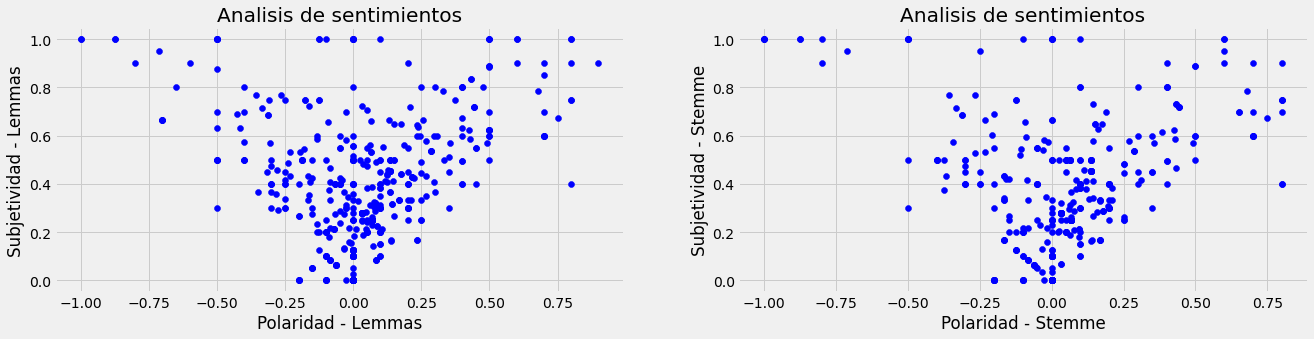

In [92]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

fig = plt.figure(figsize=(20,10))
ax1 = plt.subplot(221)
ax2 = plt.subplot(222)


#plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
  ax1.scatter(df['Polaridad - Lemmas'][i], df['Subjetividad - Lemmas'][i], color='blue')

ax1.set_title('Analisis de sentimientos')
ax1.set_xlabel('Polaridad - Lemmas')
ax1.set_ylabel('Subjetividad - Lemmas')


for i in range(0, df.shape[0]):
  ax2.scatter(df['Polaridad - Stemme'][i], df['Subjetividad - Stemme'][i], color='blue')

ax2.set_title('Analisis de sentimientos')
ax2.set_xlabel('Polaridad - Stemme')
ax2.set_ylabel('Subjetividad - Stemme')

## CONCLUSIONES



*   La lematización tiende a conservar el contexto o sentido de la palabra al hacer una generalización de la misma, mientras que el Stemming solo conserva la raíz de la palabra, por esta razón suele perder su razón. Por esta razón al momento de analizar el sentimiento la lematización se puede considerar más precisa que el Stemming; no obstante su diferencia no es amplia.
*   En la mayoria de las pruebas, un gran porcentaje de las personas tiene una opinion mas neutra. 
*   Como se aprecia en las graficas de subjetividad esta tendera a su valor máximo cuendo este en 1 , este valor conlleva a que polaridad sea muy variabe y no se mantenga constante alrededor de un punto como si sucede cuando la subjetividad es menor .
* Cuando se aplica un analisis de polaridad al segundo procesamiento realizado empleando , limpieza , tokenizado y eliminicación de stopwords, sin implmenetar Stemming o Lematización se obtiene que la neutralidad disminuye considerablemente con respecto a los otros 2 analisis,este porcentaje paso de ser neutrola  en su mayoria ser positivo . 
